### Домашнее задание по теме "Работа с переменными"

Потренируем навыки, полученные на практическом занятии. Пользуясь новыми знаниями, проведите эксплоративный анализ данных на данных недвижимости Бостона, и попытайтесь обучить линейную модель наиболее качественно. Все ваши действия и решения описывайте в markdown.
Данные вы сможете получить исполнив следующий код:
from sklearn.datasets import load_boston
import pandas as pd
data = pd.read_csv(load_boston()[‘filename’], skiprows=1)
Переменная, которую надо предсказать - ’MEDV’.
Прочитать информацию о содержимом датасета:
print(load_boston()[‘DESCR’])

In [1]:
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv(load_boston()['filename'], skiprows=1)
data.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2

In [3]:
print(load_boston()['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

#### Описание признаков

* CRIM: уровень преступности на душу населения по городам
* ZN: доля жилой земли, зонированной для участков более 25 000 кв. Футов.
* INDUS: доля не торговых площадей в каждом городе.
* CHAS: фиктивная переменная реки Чарльз (она равна 1, если тракт ограничивает реку; 0 в противном случае)
* NOX: концентрация оксидов азота (частей на 10 миллионов)
* RM: среднее количество комнат на одно жилище
* AGE: доля занятых владельцем единиц, построенных до 1940 года
* DIS: взвешенные расстояния до пяти бостонских центров занятости
* RAD: показатель доступности радиальных магистралей
* TAX: полная стоимость налога на недвижимость на 10 000 долларов
* PTRATIO: соотношение учеников и учителей по городам
* B: рассчитывается как 1000 (Bk - 0,63) ², где Bk - это доля людей афроамериканского происхождения по городам.
* LSTAT: процент населения с более низким статусом
* MEDV: средняя стоимость домов, занимаемых владельцами, в 1000 долларов

In [4]:
data.describe()

CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677082   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.105710    8.707259  168.537116    2.164946   91.294864   
min      2.900000    1.129600    1.000000  187.000000   12.600000    0.320000   
25%     45.025000    2.100175    4.000000  279.000000   17.400000  375.377500   
50%     77.500000    3.207450    5.000000  330.000000   19.050000  391.440000   
75%     94.075000    5.188425   24.000000  666.000000   20.200000  396.225000   
max    100.000000   12.126500   24.000000  711.000000   22.000000  396.900000   

            LSTAT        MEDV  
count  506.000000  506.000000  
mean    12.653063   22.532806  
std      7.141062    9.197104  
min      1.730000    5.000000  
25%      6.950000   17.025000  
50%     11.360000   21.200000  
75%     16.955000   25.000000  
max     37.970000   50.000000

In [85]:
data.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

Пропусков в данных нет

#### Оценим визуально основные зависимости
Для этого построим график попарных корреляций и тепловую карту, соответствующую матрице корреляций

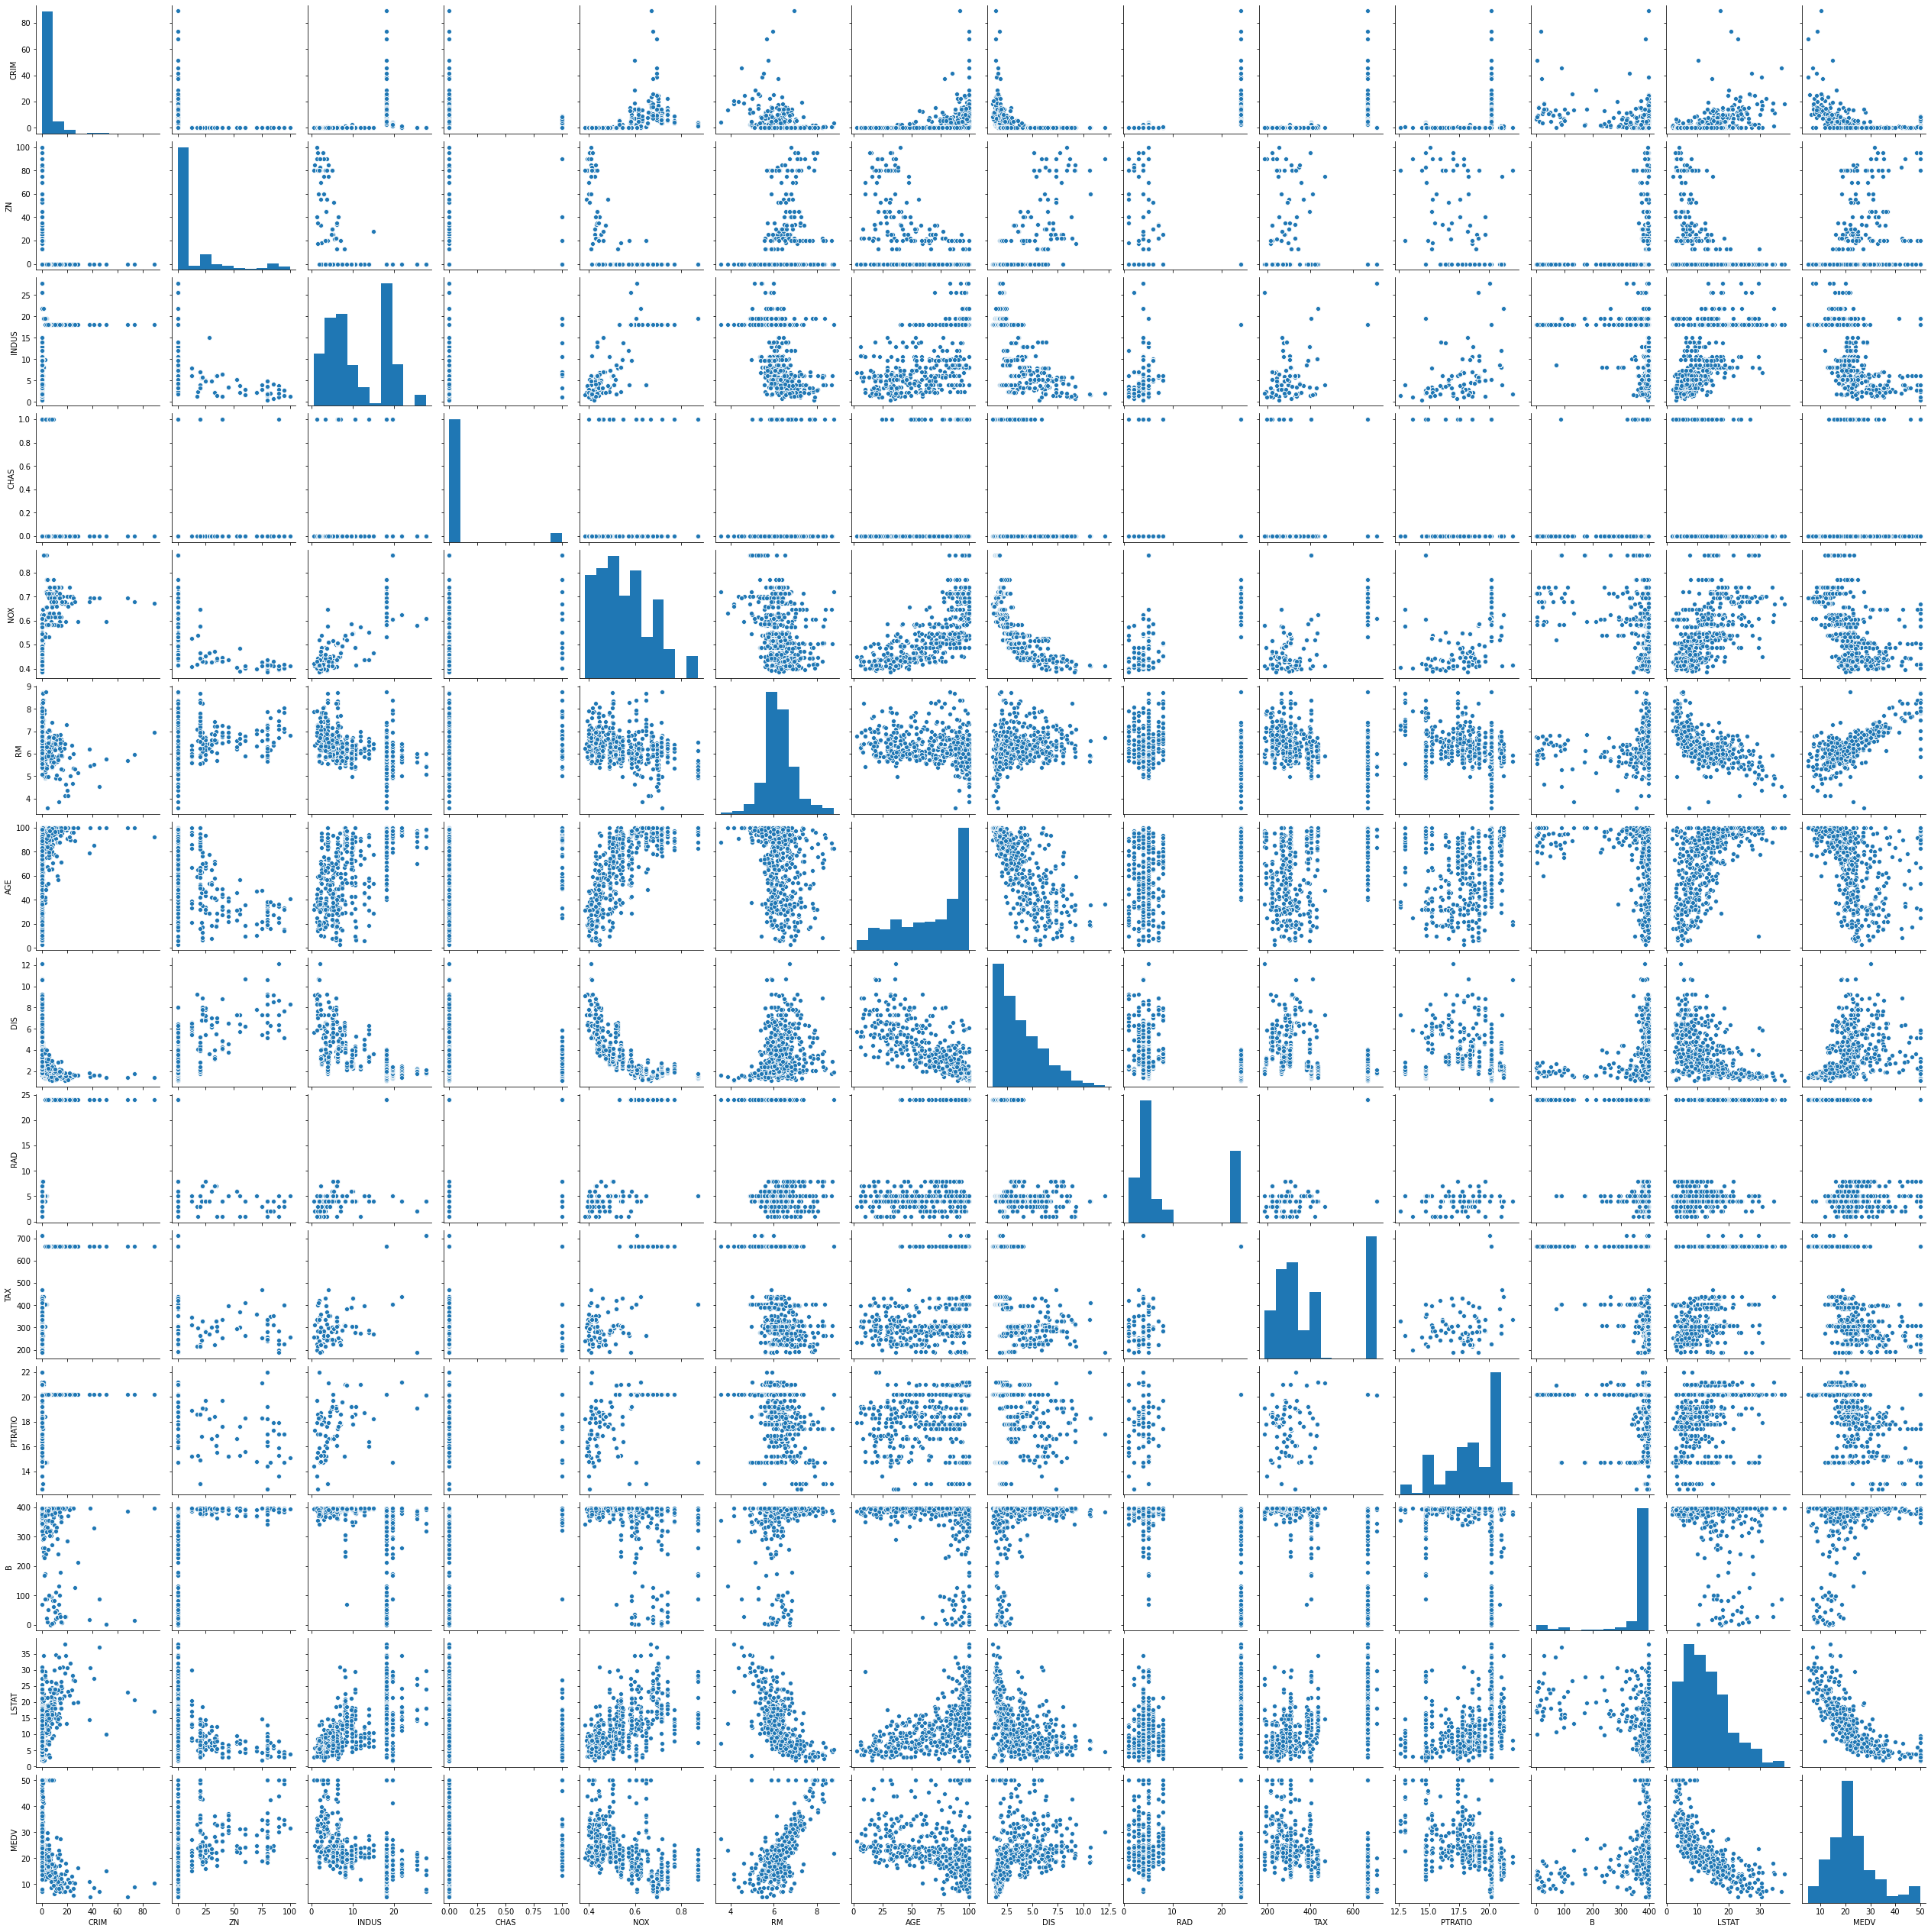

In [5]:
sns.pairplot(data)

<AxesSubplot:>

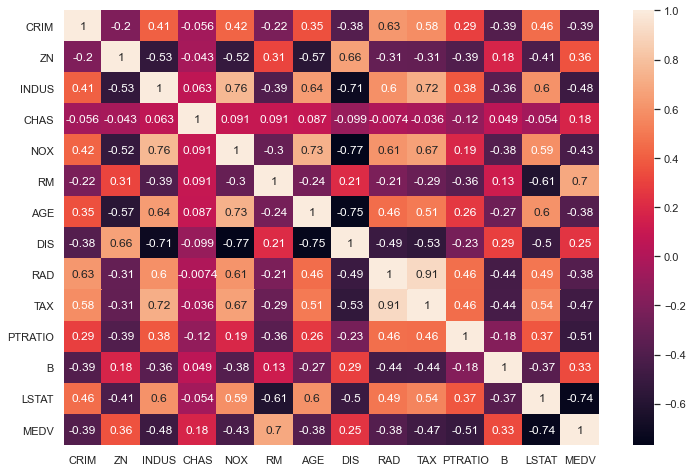

In [6]:
sns.set(rc={'figure.figsize':(12, 8)})
sns.heatmap(data.corr(), annot=True)

По графикам выше видно, что наш таргет сильнее всего коррелирует с перемеными RM (corr=0.7), LSTAT (corr=-0.74), PTRATIO (corr=-0.51). Для первых двух показателей зависимости достаточно ожидаемые. Логично, что чем больше комнат, тем больше размер дома, тем, вероятно, выше его цена. Показатель LSTAT отражает долю населения с более низким статусом. Если в районе преобладают люди с невысоким уровнем дохода, то скорее всего и жилье в этом районе будет более доступное и наоборот, поэтому обратная статистическая зависиомсть цены и LSTAT так же вполне логична. Несколько менее очевидна обратная зависимость цены и показателя PTRATIO (соотношение учеников и учителей). Мое предположение такое: низкий показатель PTRATIO говорит о том, что на одного учителя приходится меньшее количество учеников, что может наблюдаться в частных учебных заведениях или школах с высоким конкурсом на место. А такие заведения скорее встретятся в более элитных районах, где жилье дороже.

Для удобной проверки разных гипотез напишу функцию, которая будет разбивать выборку на трейн и тест, обучать линейную регрессию на подаваемых данных и возвращать score 

In [35]:
def get_score(X,y, random_seed=42, model=None):
    if model is None:
        model = LinearRegression()
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_seed )  
    model.fit(X_train, y_train)
    return model.score(X_test, y_test) 

Чтобы было от чего отталкиваться, построим модель на исходных данных в том виде, в каком они есть.

In [36]:
X, Y = data.iloc[:, :-1], data.iloc[:, -1]


In [37]:
get_score(X, Y)

0.7112260057484954

### Отбор столбцов

Попробуем обучить модель на признаках, которые наиболее сильно коррелируют с таргетом.

In [10]:
get_score(data[['LSTAT', 'RM', 'PTRATIO']], data['MEDV'])

0.650904156861472

Так же из матрицы корреляций видим, что между переменными RAD и TAX сильная корреляционная связь (corr=0.91). Т.к. одна переменная содержит достаточно много информации о второй, попробуем исключить одну из них из датасета, чтобы оставить для регрессии наиболее независимые признаки.  

In [91]:
get_score(X.drop(['RAD'], axis=1), Y)

0.6883010754490905

In [92]:
get_score(X.drop(['TAX'], axis=1), Y)

0.6983850039833561

Можем попробовать исключить из датасета признак CHAS. Он меньше остальных коррелирует с таргетом, принимает только два значения (0 и 1) и распределены эти значения неравномерно (0 у 93% объектов, 1 у 7%). Возможно, что этот признак больше мешает, чем помогает.

In [97]:
X.CHAS.value_counts(normalize=True)

0    0.93083
1    0.06917
Name: CHAS, dtype: float64

In [95]:
get_score(X.drop(['CHAS'], axis=1), Y)

0.7088141357902282

Во всех случаях результат получился хуже, чем вначале, на всех столбцах. Попробуем вернть в модель все признаки и улучшить качество другими способами.

### Масштабирование

Попробуем применить к данным масштабирование, проверим, улучшит ли это качество модели.

In [86]:
from sklearn.preprocessing import StandardScaler

In [88]:
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X_scaled.head()

C:\Users\Polina.DESKTOP-UGBOPLJ\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Polina.DESKTOP-UGBOPLJ\anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
0 -0.419782  0.284830 -1.287909 -0.272599 -0.144217  0.413672 -0.120013   
1 -0.417339 -0.487722 -0.593381 -0.272599 -0.740262  0.194274  0.367166   
2 -0.417342 -0.487722 -0.593381 -0.272599 -0.740262  1.282714 -0.265812   
3 -0.416750 -0.487722 -1.306878 -0.272599 -0.835284  1.016303 -0.809889   
4 -0.412482 -0.487722 -1.306878 -0.272599 -0.835284  1.228577 -0.511180   

        DIS       RAD       TAX   PTRATIO         B     LSTAT  
0  0.140214 -0.982843 -0.666608 -1.459000  0.441052 -1.075562  
1  0.557160 -0.867883 -0.987329 -0.303094  0.441052 -0.492439  
2  0.557160 -0.867883 -0.987329 -0.303094  0.396427 -1.208727  
3  1.077737 -0.752922 -1.106115  0.113032  0.416163 -1.361517  
4  1.077737 -0.752922 -1.106115  0.113032  0.441052 -1.026501

In [89]:
get_score(X_scaled, Y)

0.7112260057484923

Результат почти идентичный результату, полученному от регрессии по всем столбцам без изменений 

### Работа с переменными

Большинство признаков в этом датасете - числовые. К категориальным можно отнести CHAS (показывает наличие границы с рекой) и RAD (индекс доступности магистралей). Последний принимает значения из списка [ 1,  2,  3,  5,  4,  8,  6,  7, 24]. Скорее всего это порядковая категориальная переменная (из описания датасета это до конца не ясно), на которой линейная регрессия может обучаться. Но т.к. значений, которые эта переменная принимает, не очень много, мы можем попробовать провести one hot encoding и посмотреть на результат.

In [103]:
X.RAD.unique()

array([ 1,  2,  3,  5,  4,  8,  6,  7, 24], dtype=int64)

In [100]:
X_upd = pd.concat([X.drop(['RAD'], axis=1),pd.get_dummies(X['RAD'], prefix='RAD')], axis=1)
X_upd

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  TAX  PTRATIO  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900  296     15.3   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671  242     17.8   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671  242     17.8   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622  222     18.7   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622  222     18.7   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...      ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786  273     21.0   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875  273     21.0   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675  273     21.0   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889  273     21.0   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050  273     21.0   

     ...  LSTAT  RAD_1  RAD_2  RAD_3  RAD_4  RAD_5  RAD_6  RAD_7  RAD_8  \
0    ...   4.98      1      0      0      0      0      0      0      0   
1    ...   9.14      0      1      0      0      0      0      0      0   
2    ...   4.03      0      1      0      0      0      0      0      0   
3    ...   2.94      0      0      1      0      0      0      0      0   
4    ...   5.33      0      0      1      0      0      0      0      0   
..   ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
501  ...   9.67      1      0      0      0      0      0      0      0   
502  ...   9.08      1      0      0      0      0      0      0      0   
503  ...   5.64      1      0      0      0      0      0      0      0   
504  ...   6.48      1      0      0      0      0      0      0      0   
505  ...   7.88      1      0      0      0      0      0      0      0   

     RAD_24  
0         0  
1         0  
2         0  
3         0  
4         0  
..      ...  
501       0  
502       0  
503       0  
504       0  
505       0  

[506 rows x 21 columns]

In [101]:
X_upd.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'RAD_1', 'RAD_2', 'RAD_3', 'RAD_4', 'RAD_5',
       'RAD_6', 'RAD_7', 'RAD_8', 'RAD_24'],
      dtype='object')

In [102]:
get_score(X_upd, Y)

0.7146830631847048

Результат незначительно, но улучшился (было ~0,711)

#### Выбросы

Из построенного вначале sns.pairplot было видно, что некоторые точки выделяются как выбросы. В нашем случае удалять выбросы кажется не самым разумным решением, т.к. в датасете всего 506 строк. Это достаточно мало, потеря даже нескольких строк может оказаться существенной

#### Логарифмирование признаков

Несколько наших признаков имеют распределения с досаточно длинными хвостами вправо или влево. К таким можно отнести в первую очередь CRIM, ZN, B, а так же в меньшей степени DIS, AGE, PTRATIO. Столбец ZN не получится прологарифмировать, т.к. min значение в этом столбце 0, от которого нельзя взять логарифм. С остальными столбцами мы можем поэксперементировать. 

C:\Users\Polina.DESKTOP-UGBOPLJ\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


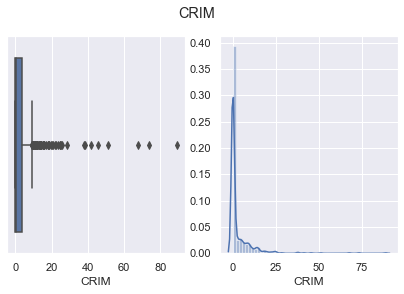

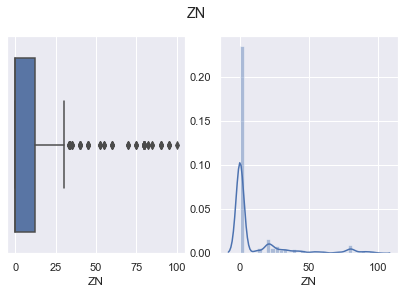

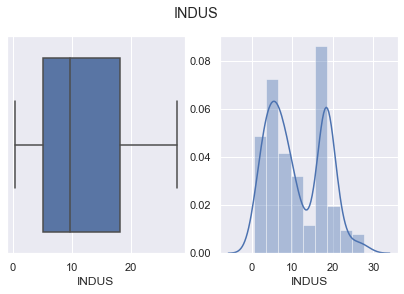

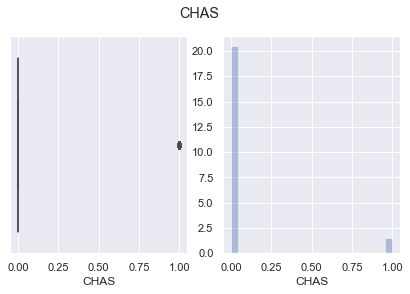

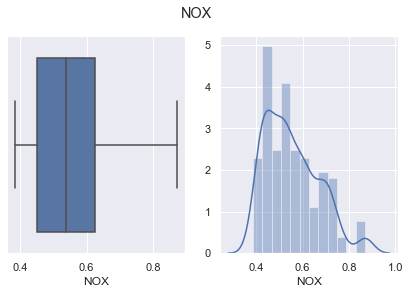

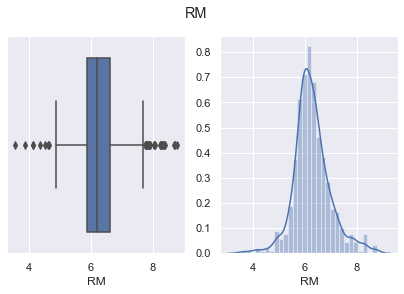

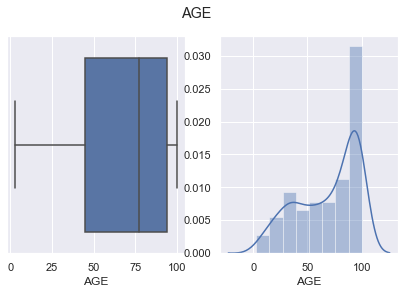

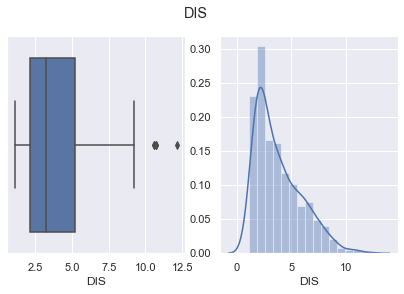

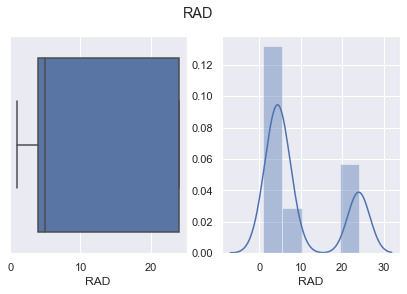

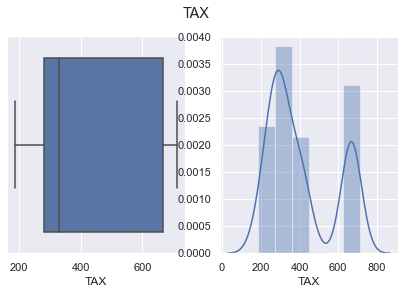

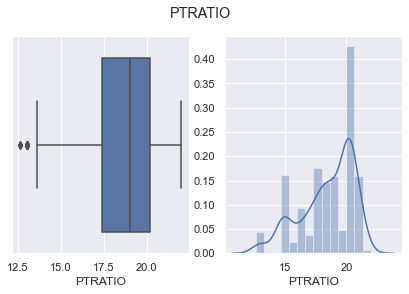

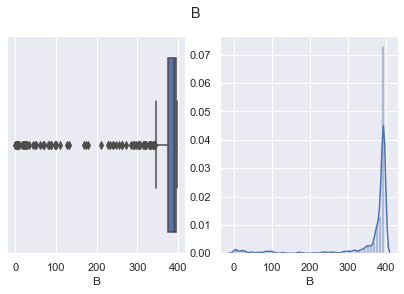

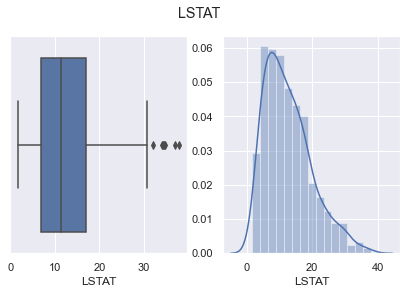

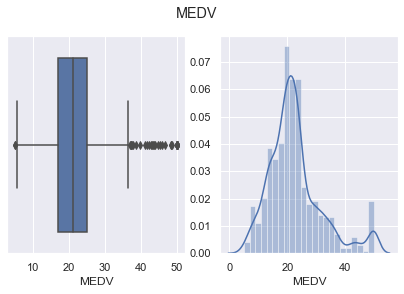

In [84]:
for col in data.columns:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(7, 4))
    fig.suptitle(col)
    sns.boxplot(data[col], ax=ax1)
    sns.distplot(data[col], ax=ax2)

In [112]:
cols1 = ['CRIM', 'B']
cols2 = ['CRIM', 'B', 'DIS', 'AGE', 'PTRATIO']
X_log1 = pd.concat([X_upd.drop(cols1, axis=1), np.log(X_upd[cols1])], axis=1)
X_log2 = pd.concat([X_upd.drop(cols2, axis=1), np.log(X_upd[cols2])], axis=1)
X_log1.head()

ZN  INDUS  CHAS    NOX     RM   AGE     DIS  TAX  PTRATIO  LSTAT  ...  \
0  18.0   2.31     0  0.538  6.575  65.2  4.0900  296     15.3   4.98  ...   
1   0.0   7.07     0  0.469  6.421  78.9  4.9671  242     17.8   9.14  ...   
2   0.0   7.07     0  0.469  7.185  61.1  4.9671  242     17.8   4.03  ...   
3   0.0   2.18     0  0.458  6.998  45.8  6.0622  222     18.7   2.94  ...   
4   0.0   2.18     0  0.458  7.147  54.2  6.0622  222     18.7   5.33  ...   

   RAD_2  RAD_3  RAD_4  RAD_5  RAD_6  RAD_7  RAD_8  RAD_24      CRIM         B  
0      0      0      0      0      0      0      0       0 -5.064036  5.983684  
1      1      0      0      0      0      0      0       0 -3.600502  5.983684  
2      1      0      0      0      0      0      0       0 -3.601235  5.973377  
3      0      1      0      0      0      0      0       0 -3.430523  5.977949  
4      0      1      0      0      0      0      0       0 -2.672924  5.983684  

[5 rows x 21 columns]

In [113]:
X_log1.columns

Index(['ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX', 'PTRATIO',
       'LSTAT', 'RAD_1', 'RAD_2', 'RAD_3', 'RAD_4', 'RAD_5', 'RAD_6', 'RAD_7',
       'RAD_8', 'RAD_24', 'CRIM', 'B'],
      dtype='object')

In [114]:
get_score(X_log1, Y)

0.7202465306427275

In [115]:
get_score(X_log2, Y)

0.7384682658007549

Результат стал заметно лучше.
Проверим, что будет, если мы применим логарифмирование ко всем столбцам, которые не содержат 0.

In [117]:
X_log_all = pd.concat([X[['CHAS', 'ZN']], np.log(X.drop(['CHAS', 'ZN'], axis=1))], axis=1)
X_log_all.head()

CHAS    ZN      CRIM     INDUS       NOX        RM       AGE       DIS  \
0     0  18.0 -5.064036  0.837248 -0.619897  1.883275  4.177459  1.408545   
1     0   0.0 -3.600502  1.955860 -0.757153  1.859574  4.368181  1.602836   
2     0   0.0 -3.601235  1.955860 -0.757153  1.971996  4.112512  1.602836   
3     0   0.0 -3.430523  0.779325 -0.780886  1.945624  3.824284  1.802073   
4     0   0.0 -2.672924  0.779325 -0.780886  1.966693  3.992681  1.802073   

        RAD       TAX   PTRATIO         B     LSTAT  
0  0.000000  5.690359  2.727853  5.983684  1.605430  
1  0.693147  5.488938  2.879198  5.983684  2.212660  
2  0.693147  5.488938  2.879198  5.973377  1.393766  
3  1.098612  5.402677  2.928524  5.977949  1.078410  
4  1.098612  5.402677  2.928524  5.983684  1.673351

In [118]:
get_score(X_log_all, Y)

0.7723908087521771

В данном случае эта тактика оказалась наиболее эффективной и добавила около 6% к точности прогноза.